# Model training

#### BTC-USDT for ROR_n5 with price action features


<br>

#### Performance by Model ID

```
model_id: e1afc23760a3c777224189577d20c93aa5e135e5
    - n_estimates = 500
    - max_depth = 10
    - Mean Absolute Error: 0.00082
    - Mean Absolute Outcome: 0.01254
    - Mean Absolute Percent Error: 0.06553
    - Error Variance: 1e-05
    - R-Squared: 0.97942
```


<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [1]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [ ]:
# Load model data
data = dataObject("""
with

ticker_data as (
  select
    ticker_time,
    ticker_time_sec,
    ticker,
    `interval` as ticker_interval,
    ROR_n1,
    ROR_n5,
    ROR_n10,
    ROR_n20,
    ROR_n25,
    ROR_n30,
    volume_base,
    volume,
    open as open1,
    high as high1,
    low as low1,
    close as close1,
    rank() over (partition by ticker_time order by etl_time desc) as load_rank,
  from `algom-trading.train_features.features_BTC_USDT_hour_i02_20200101`
  )

select * except(
  open1, high1, low1, close1, open2, high2, low2, close2, open3, high3, low3, close3, open4, high4, low4, close4, 
  open5, high5, low5, close5, open6, high6, low6, close6, open7, high7, low7, close7, open8, high8, low8, close8, 
  open9, high9, low9, close9, open10, high10, low10, close10, open11, high11, low11, close11, open12, high12, low12, close12, 
  open13, high13, low13, close13, open14, high14, low14, close14, open15, high15, low15, close15, open16, high16, low16, close16, 
  open17, high17, low17, close17, open18, high18, low18, close18, open19, high19, low19, close19, open20, high20, low20, close20, 
  open21, high21, low21, close21, open22, high22, low22, close22, open23, high23, low23, close23, open24, high24, low24, close24),

  round(log(safe_divide(close1, open24)), 5) as open_close1,
  round(log(safe_divide(high1, open24)), 5)  as open_high1,
  round(log(safe_divide(low1, open24)), 5)   as open_low1,

  round(log(safe_divide(close2, open24)), 5) as open_close2,
  round(log(safe_divide(high2, open24)), 5)  as open_high2,
  round(log(safe_divide(low2, open24)), 5)   as open_low2,

  round(log(safe_divide(close3, open24)), 5) as open_close3,
  round(log(safe_divide(high3, open24)), 5)  as open_high3,
  round(log(safe_divide(low3, open24)), 5)   as open_low3,

  round(log(safe_divide(close4, open24)), 5) as open_close4,
  round(log(safe_divide(high4, open24)), 5)  as open_high4,
  round(log(safe_divide(low4, open24)), 5)   as open_low4,

  round(log(safe_divide(close5, open24)), 5) as open_close5,
  round(log(safe_divide(high5, open24)), 5)  as open_high5,
  round(log(safe_divide(low5, open24)), 5)   as open_low5,

  round(log(safe_divide(close6, open24)), 5) as open_close6,
  round(log(safe_divide(high6, open24)), 5)  as open_high6,
  round(log(safe_divide(low6, open24)), 5)   as open_low6,

  round(log(safe_divide(close7, open24)), 5) as open_close7,
  round(log(safe_divide(high7, open24)), 5)  as open_high7,
  round(log(safe_divide(low7, open24)), 5)   as open_low7,

  round(log(safe_divide(close8, open24)), 5) as open_close8,
  round(log(safe_divide(high8, open24)), 5)  as open_high8,
  round(log(safe_divide(low8, open24)), 5)   as open_low8,
  
  round(log(safe_divide(close9, open24)), 5) as open_close9,
  round(log(safe_divide(high9, open24)), 5)  as open_high9,
  round(log(safe_divide(low9, open24)), 5)   as open_low9,

  round(log(safe_divide(close10, open24)), 5) as open_close10,
  round(log(safe_divide(high10, open24)), 5)  as open_high10,
  round(log(safe_divide(low10, open24)), 5)   as open_low10,

  round(log(safe_divide(close11, open24)), 5) as open_close11,
  round(log(safe_divide(high11, open24)), 5)  as open_high11,
  round(log(safe_divide(low11, open24)), 5)   as open_low11,

  round(log(safe_divide(close12, open24)), 5) as open_close12,
  round(log(safe_divide(high12, open24)), 5)  as open_high12,
  round(log(safe_divide(low12, open24)), 5)   as open_low12,

  round(log(safe_divide(close13, open24)), 5) as open_close13,
  round(log(safe_divide(high13, open24)), 5)  as open_high13,
  round(log(safe_divide(low13, open24)), 5)   as open_low13,

  round(log(safe_divide(close14, open24)), 5) as open_close14,
  round(log(safe_divide(high14, open24)), 5)  as open_high14,
  round(log(safe_divide(low14, open24)), 5)   as open_low14,

  round(log(safe_divide(close15, open24)), 5) as open_close15,
  round(log(safe_divide(high15, open24)), 5)  as open_high15,
  round(log(safe_divide(low15, open24)), 5)   as open_low15,

  round(log(safe_divide(close16, open24)), 5) as open_close16,
  round(log(safe_divide(high16, open24)), 5)  as open_high16,
  round(log(safe_divide(low16, open24)), 5)   as open_low16,

  round(log(safe_divide(close17, open24)), 5) as open_close17,
  round(log(safe_divide(high17, open24)), 5)  as open_high17,
  round(log(safe_divide(low17, open24)), 5)   as open_low17,

  round(log(safe_divide(close18, open24)), 5) as open_close18,
  round(log(safe_divide(high18, open24)), 5)  as open_high18,
  round(log(safe_divide(low18, open24)), 5)   as open_low18,

  round(log(safe_divide(close19, open24)), 5) as open_close19,
  round(log(safe_divide(high19, open24)), 5)  as open_high19,
  round(log(safe_divide(low19, open24)), 5)   as open_low19,

  round(log(safe_divide(close20, open24)), 5) as open_close20,
  round(log(safe_divide(high20, open24)), 5)  as open_high20,
  round(log(safe_divide(low20, open24)), 5)   as open_low20,

  round(log(safe_divide(close21, open24)), 5) as open_close21,
  round(log(safe_divide(high21, open24)), 5)  as open_high21,
  round(log(safe_divide(low21, open24)), 5)   as open_low21,

  round(log(safe_divide(close22, open24)), 5) as open_close22,
  round(log(safe_divide(high22, open24)), 5)  as open_high22,
  round(log(safe_divide(low22, open24)), 5)   as open_low22,

  round(log(safe_divide(close23, open24)), 5) as open_close23,
  round(log(safe_divide(high23, open24)), 5)  as open_high23,
  round(log(safe_divide(low23, open24)), 5)   as open_low23,

  round(log(safe_divide(close24, open24)), 5) as open_close24,
  round(log(safe_divide(high24, open24)), 5)  as open_high24,
  round(log(safe_divide(low24, open24)), 5)   as open_low24,

from (
    select * except(load_rank),

    lag(open1) over (order by ticker_time)  as open2,
    lag(high1) over (order by ticker_time)  as high2,
    lag(low1) over (order by ticker_time)   as low2,
    lag(close1) over (order by ticker_time) as close2,

    lag(open1, 2) over (order by ticker_time)  as open3,
    lag(high1, 2) over (order by ticker_time)  as high3,
    lag(low1, 2) over (order by ticker_time)   as low3,
    lag(close1, 2) over (order by ticker_time) as close3,

    lag(open1, 3) over (order by ticker_time)  as open4,
    lag(high1, 3) over (order by ticker_time)  as high4,
    lag(low1, 3) over (order by ticker_time)   as low4,
    lag(close1, 3) over (order by ticker_time) as close4,

    lag(open1, 4) over (order by ticker_time)  as open5,
    lag(high1, 4) over (order by ticker_time)  as high5,
    lag(low1, 4) over (order by ticker_time)   as low5,
    lag(close1, 4) over (order by ticker_time) as close5,

    lag(open1, 5) over (order by ticker_time)  as open6,
    lag(high1, 5) over (order by ticker_time)  as high6,
    lag(low1, 5) over (order by ticker_time)   as low6,
    lag(close1, 5) over (order by ticker_time) as close6,

    lag(open1, 6) over (order by ticker_time)  as open7,
    lag(high1, 6) over (order by ticker_time)  as high7,
    lag(low1, 6) over (order by ticker_time)   as low7,
    lag(close1, 6) over (order by ticker_time) as close7,

    lag(open1, 7) over (order by ticker_time)  as open8,
    lag(high1, 7) over (order by ticker_time)  as high8,
    lag(low1, 7) over (order by ticker_time)   as low8,
    lag(close1, 7) over (order by ticker_time) as close8,

    lag(open1, 8) over (order by ticker_time)  as open9,
    lag(high1, 8) over (order by ticker_time)  as high9,
    lag(low1, 8) over (order by ticker_time)   as low9,
    lag(close1, 8) over (order by ticker_time) as close9,

    lag(open1, 9) over (order by ticker_time)  as open10,
    lag(high1, 9) over (order by ticker_time)  as high10,
    lag(low1, 9) over (order by ticker_time)   as low10,
    lag(close1, 9) over (order by ticker_time) as close10,

    lag(open1, 10) over (order by ticker_time)  as open11,
    lag(high1, 10) over (order by ticker_time)  as high11,
    lag(low1, 10) over (order by ticker_time)   as low11,
    lag(close1, 10) over (order by ticker_time) as close11,

    lag(open1, 11) over (order by ticker_time)  as open12,
    lag(high1, 11) over (order by ticker_time)  as high12,
    lag(low1, 11) over (order by ticker_time)   as low12,
    lag(close1, 11) over (order by ticker_time) as close12,

    lag(open1, 12) over (order by ticker_time)  as open13,
    lag(high1, 12) over (order by ticker_time)  as high13,
    lag(low1, 12) over (order by ticker_time)   as low13,
    lag(close1, 12) over (order by ticker_time) as close13,

    lag(open1, 13) over (order by ticker_time)  as open14,
    lag(high1, 13) over (order by ticker_time)  as high14,
    lag(low1, 13) over (order by ticker_time)   as low14,
    lag(close1, 13) over (order by ticker_time) as close14,

    lag(open1, 14) over (order by ticker_time)  as open15,
    lag(high1, 14) over (order by ticker_time)  as high15,
    lag(low1, 14) over (order by ticker_time)   as low15,
    lag(close1, 14) over (order by ticker_time) as close15,

    lag(open1, 15) over (order by ticker_time)  as open16,
    lag(high1, 15) over (order by ticker_time)  as high16,
    lag(low1, 15) over (order by ticker_time)   as low16,
    lag(close1, 15) over (order by ticker_time) as close16,

    lag(open1, 16) over (order by ticker_time)  as open17,
    lag(high1, 16) over (order by ticker_time)  as high17,
    lag(low1, 16) over (order by ticker_time)   as low17,
    lag(close1, 16) over (order by ticker_time) as close17,

    lag(open1, 17) over (order by ticker_time)  as open18,
    lag(high1, 17) over (order by ticker_time)  as high18,
    lag(low1, 17) over (order by ticker_time)   as low18,
    lag(close1, 17) over (order by ticker_time) as close18,

    lag(open1, 18) over (order by ticker_time)  as open19,
    lag(high1, 18) over (order by ticker_time)  as high19,
    lag(low1, 18) over (order by ticker_time)   as low19,
    lag(close1, 18) over (order by ticker_time) as close19,

    lag(open1, 19) over (order by ticker_time)  as open20,
    lag(high1, 19) over (order by ticker_time)  as high20,
    lag(low1, 19) over (order by ticker_time)   as low20,
    lag(close1, 19) over (order by ticker_time) as close20,

    lag(open1, 20) over (order by ticker_time)  as open21,
    lag(high1, 20) over (order by ticker_time)  as high21,
    lag(low1, 20) over (order by ticker_time)   as low21,
    lag(close1, 20) over (order by ticker_time) as close21,

    lag(open1, 21) over (order by ticker_time)  as open22,
    lag(high1, 21) over (order by ticker_time)  as high22,
    lag(low1, 21) over (order by ticker_time)   as low22,
    lag(close1, 21) over (order by ticker_time) as close22,

    lag(open1, 22) over (order by ticker_time)  as open23,
    lag(high1, 22) over (order by ticker_time)  as high23,
    lag(low1, 22) over (order by ticker_time)   as low23,
    lag(close1, 22) over (order by ticker_time) as close23,

    lag(open1, 23) over (order by ticker_time)  as open24,
    lag(high1, 23) over (order by ticker_time)  as high24,
    lag(low1, 23) over (order by ticker_time)   as low24,
    lag(close1, 23) over (order by ticker_time) as close24,

    from ticker_data
    where load_rank = 1
    )
where
  close12 is not null
  and ROR_n30 is not null
order by ticker_time
""")

In [ ]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

<br>

### Initialize modelRegression class

In [4]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n5',
    model_id='e1afc23760a3c777224189577d20c93aa5e135e5',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
SUCCESS: Model e1afc23760a3c777224189577d20c93aa5e135e5 has been loaded successfully.
Downloaded file from GCS to: /home/jovyan/algomosaic/data/models/20210102_GradientBoostingRegressor_e1afc23760a3c777224189577d20c93aa5e135e5.pickle
Initialized model. As a next step, run self.predict() or self.train().


In [5]:
# len(model.feature_list)
# list(model.feature_list)

In [6]:
# Train model
model.predict()


Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Get model performance.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.00073
        - Mean Absolute Outcome:	 0.00941
        - Mean Absolute Percent Error:	 0.07748
        - Error Variance:	 4e-05
        - R-Squared:		 0.83869
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predictions_histogram(start_date, end_date)`
              `self.plot_errors_by_date(start_date, end_date)`
              `self.plot_errors_histogram(start_date, end_date)`
              `se

In [7]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)

model_id: e1afc23760a3c777224189577d20c93aa5e135e5
model_execution_id: 487dc05ab2ab3052b414fb7dc3c2594cd15550fb


<br><br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [18]:
start_date='2020-05-01'
end_date='2020-06-01'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


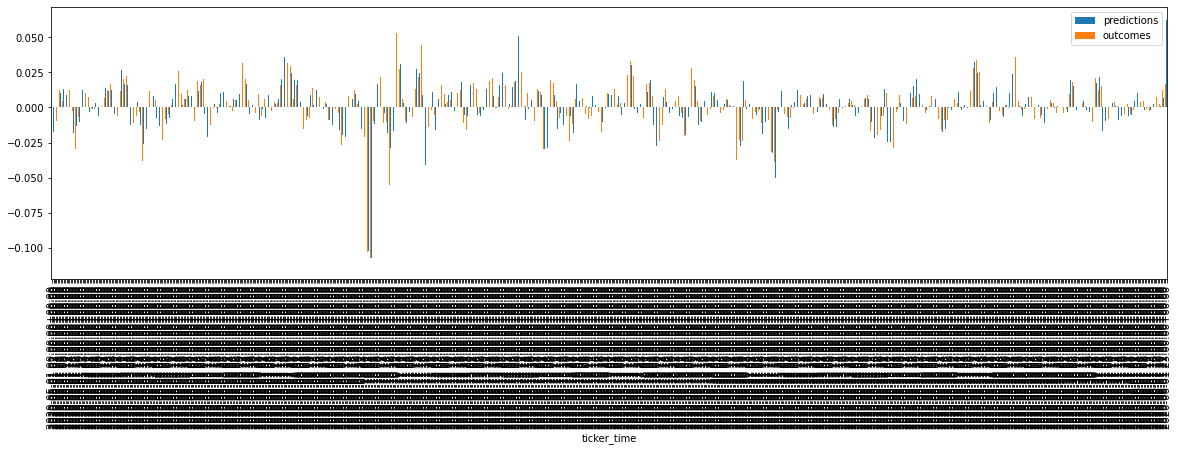

In [19]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


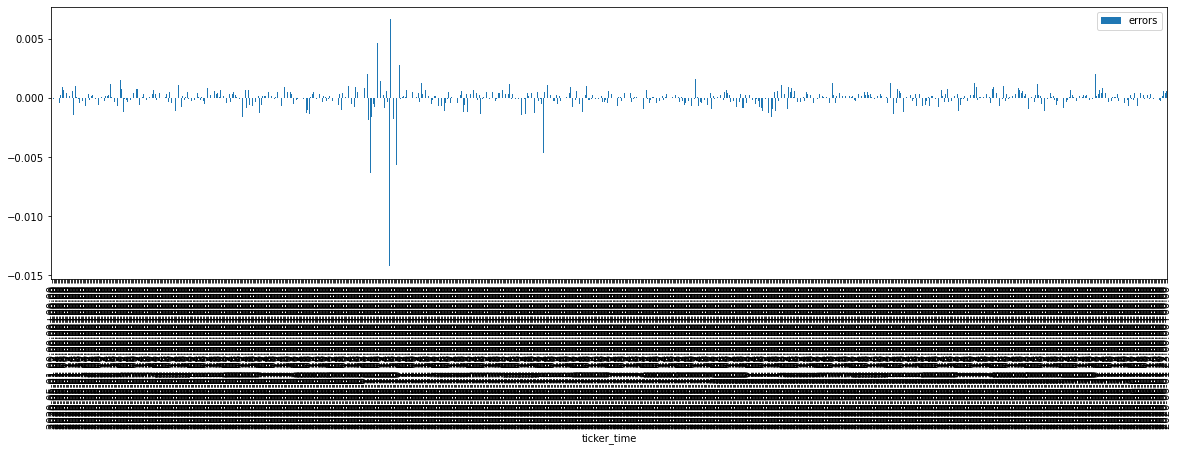

In [20]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


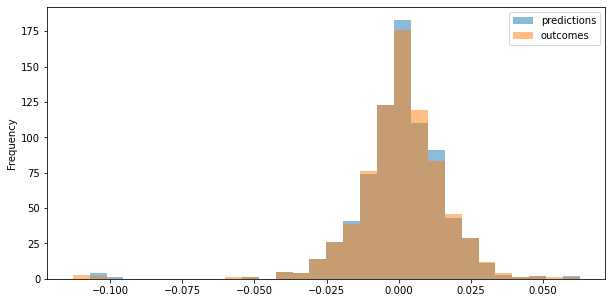

In [21]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


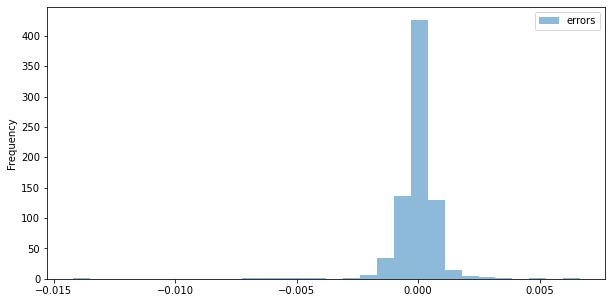

In [22]:
model_plot.plot_errors_histogram(start_date, end_date)

PLOT: Predictions by Date


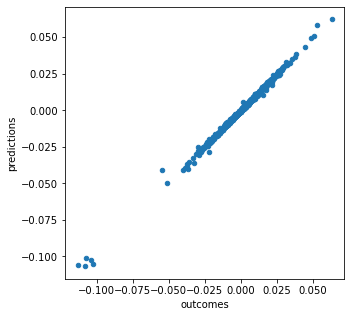

In [23]:
model_plot.plot_predictions_scatterplot(start_date, end_date)